Calibrer un appareil photo à l'aide d'un support et de la Décomposition en Valeurs Singulières (DVS) est une technique courante en vision par ordinateur et en photogrammétrie. Ce processus implique d'estimer les paramètres intrinsèques (comme la distance focale, le point principal et la distorsion de l'objectif) et les paramètres extrinsèques (position et orientation) de l'appareil photo.

Considérons les coordonnées du monde comme $(X, Y, Z)$, et les coordonnées de l'image comme $(u, v)$. La relation entre eux peut être représentée à l'aide du modèle de caméra sténopé :

$$
s \begin{bmatrix} u \\ v \\ 1 \end{bmatrix} = \mathbf{K} \begin{bmatrix} \mathbf{R} | \mathbf{t} \end{bmatrix} \begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}
$$

Ici,
- $s$ est un facteur d'échelle.
- $\mathbf{K}$ est la matrice de calibration de l'appareil photo contenant les paramètres intrinsèques.
- $\begin{bmatrix} \mathbf{R} | \mathbf{t} \end{bmatrix}$ est la matrice extrinsèque contenant la matrice de rotation $\mathbf{R}$ et le vecteur de translation $\mathbf{t}$.

En supposant que nous disposons d'un montage avec des points 3D connus $(X_i, Y_i, Z_i)$ et leurs points d'image correspondants $(u_i, v_i)$, nous pouvons établir un ensemble d'équations :

$$
\begin{align*}
su_i &= k_{11}X_i + k_{12}Y_i + k_{13}Z_i + t_{1}Z_i \\
sv_i &= k_{21}X_i + k_{22}Y_i + k_{23}Z_i + t_{2}Z_i
\end{align*}
$$

En réarrangeant, nous obtenons :

$$
\begin{bmatrix} X_i & Y_i & Z_i & 1 & 0 & 0 & 0 & 0 & -u_iX_i & -u_iY_i & -u_iZ_i & -u_i\\ 0 & 0 & 0 & 0 & X_i & Y_i & Z_i & 1 & -v_iX_i & -v_iY_i & -v_iZ_i & -v_i \end{bmatrix} \begin{bmatrix} k_{11} \\ k_{12} \\ k_{13} \\ k_{21} \\ k_{22} \\ k_{23} \\ t_1 \\ t_2 \\ t_3 \end{bmatrix}
$$

Cela peut être représenté sous forme matricielle comme :

$$
\mathbf{A} \mathbf{P} = \mathbf{0}
$$

où $\mathbf{A}$ est une matrice connue, $\mathbf{P}$ est le vecteur des inconnues, et $\mathbf{0}$ est un vecteur nul.

En utilisant la Décomposition en Valeurs Singulières, nous pouvons trouver la solution $\mathbf{P}$ en décomposant $\mathbf{A}$ comme :

$$
\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
$$

Le vecteur singulier droit correspondant à la plus petite valeur singulière nous donnera $\mathbf{P}$.

Cette approche est basée sur la méthode de la Transformation Linéaire Directe (TLD). Une fois que nous avons $\mathbf{P}$, nous pouvons extraire les paramètres intrinsèques et extrinsèques. Les paramètres intrinsèques peuvent être extraits de $\mathbf{K}$ en utilisant la décomposition RQ.

La preuve de cette méthode implique de l'algèbre linéaire et dépasse le cadre de cette réponse. Elle nécessite souvent une bonne compréhension de l'algèbre matricielle, de la DVS et de la géométrie projective. Si vous êtes intéressé par une démonstration détaillée, je vous recommande de consulter des manuels ou des articles de recherche sur la calibration d'appareil photo à l'aide de la DVS.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
from numpy import linalg as LA

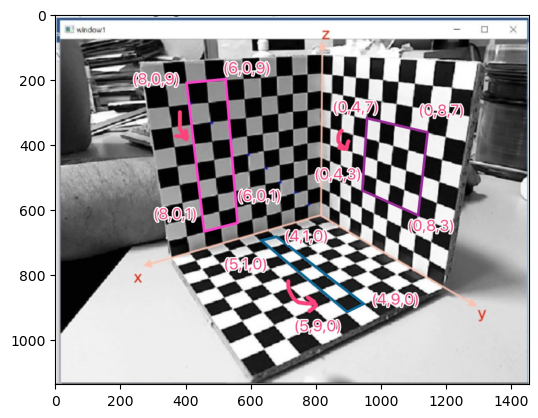

In [2]:
image=cv2.imread('data/1.jpg')
plt.imshow(np.flip(image,-1))

In [3]:

# coordonnées 3D

w_coor =np.array([[8, 0, 9, 1],
       [8, 0, 1, 1],
       [6, 0, 1, 1],
       [6, 0, 9, 1],
       [5, 1, 0, 1],
       [5, 9, 0, 1],
       [4, 9, 0, 1],
       [4, 1, 0, 1],
       [0, 4, 7, 1],
       [0, 4, 8, 1],
       [0, 8, 3, 1],
       [0, 8, 7, 1]])

# coordonnées camera
c_coor = np.array([[275, 142],
       [312, 454],
       [382, 436],
       [357, 134],
       [432, 473],
       [612, 623],
       [647, 606],
       [464, 465],
       [654, 216],
       [644, 368],
       [761, 420],
       [781, 246]])



In [4]:

# coordonnées pour valider si le M est correct ou non

w_check=np.array([[6, 0, 5, 1],
       [3, 3, 0, 1],
       [0, 4, 0, 1],
       [0, 4, 4, 1],
       [0, 0, 7, 1]])
c_check=np.array([[369, 297],
       [531, 484],
       [640, 468],
       [646, 333],
       [556, 194]])

In [5]:
print('P :', w_coor.shape),print('p :',c_coor.shape)

P : (12, 4)
p : (12, 2)


(None, None)

In [6]:
print(c_check.shape)

(5, 2)


In [7]:
i = 0
P = np.empty([12, 12], dtype=float)

while i < 12:
            c = i // 2

            p1 = w_coor[c]
            p2 = np.array([0, 0, 0, 0])
            if i % 2 == 0:
                p3 = -p1 *c_coor[c][0]

                P[i] = np.hstack((p1, p2, p3))

            elif i % 2 == 1:
                p3 = -p1 * c_coor[c][1]

                P[i] = np.hstack((p2, p1, p3))

            i = i + 1



In [8]:
print("Maintenant, P est avec la forme de :", P.shape)
print(P[0])


Maintenant, P est avec la forme de : (12, 12)
[ 8.000e+00  0.000e+00  9.000e+00  1.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00 -2.200e+03  0.000e+00 -2.475e+03 -2.750e+02]


In [9]:
U, sigma, VT = LA.svd(P)

In [10]:
print('U :',U.shape)
print('Sigma :',sigma.shape)
print('V :',VT.shape)

U : (12, 12)
Sigma : (12,)
V : (12, 12)


In [11]:


V = np.transpose(VT)
preM = V[:, -1]
roM = preM.reshape(3, 4)


In [12]:
print("Un multiple scalaire de M, enregistré comme roM:")
print(roM)

Un multiple scalaire de M, enregistré comme roM:
[[ 5.09062054e-02  8.57319746e-05  1.13715227e-02 -8.00120344e-01]
 [-1.28406856e-03  5.23626831e-03  5.06416451e-02 -5.95391485e-01]
 [ 2.16381463e-05  4.64691136e-05  2.08447117e-05 -1.41669321e-03]]


Étant donné la matrice de projection :

$$
M = K \begin{bmatrix} R | T \end{bmatrix}
$$

où $K$ est la matrice intrinsèque, et $\begin{bmatrix} R | T \end{bmatrix}$ est la matrice extrinsèque.

1. **Matrice intrinsèque ($K$):**

   La matrice intrinsèque contient des informations sur la distance focale, le point principal et le facteur d'obliquité. Elle est donnée par la sous-matrice 3x3 supérieure gauche de $M$ :

   $$
   M = K \begin{bmatrix} R | T \end{bmatrix}
  $$

   - $f_x$ et $f_y$ sont les distances focales dans les directions x et y respectivement.
   - $s$ est le facteur d'obliquité, qui est généralement nul dans les caméras bien calibrées.
   - $c_x$ et $c_y$ sont les coordonnées du point principal.

2. **Matrice extrinsèque ($R | T$):**

   La matrice extrinsèque contient des informations sur la position et l'orientation de la caméra dans le système de coordonnées mondiales. Elle est donnée par le côté droit de la matrice de projection :

   $$
   \begin{bmatrix} R | T \end{bmatrix} = \begin{bmatrix} r_{11} & r_{12} & r_{13} & t_x \\ r_{21} & r_{22} & r_{23} & t_y \\ r_{31} & r_{32} & r_{33} & t_z \end{bmatrix}
   $$
   - La sous-matrice 3x3 supérieure gauche $\begin{bmatrix} r_{ij} \end{bmatrix}$ est la matrice de rotation.
   - La colonne la plus à droite $\begin{bmatrix} t_x \\ t_y \ t_z \end{bmatrix}$ est le vecteur de translation.

Une fois que vous avez la matrice de projection $M$, on peut extraire la matrice intrinsèque $K$ et la matrice extrinsèque $\begin{bmatrix} r_{ij} \end{bmatrix}$ comme décrit ci-dessus.
<img src="https://drive.google.com/uc?export=view&id=19ufAjJGwr9KUz0JZU2SXz7xeBCl7Xv3k">


In [13]:

A = roM[0:3, 0:3].copy()
b = roM[0:3, 3:4].copy()
print("M peut être écrit sous la forme [A b], où A est 3x3 et b est 3x1, comme suit:")
print(A)
print(b)


M peut être écrit sous la forme [A b], où A est 3x3 et b est 3x1, comme suit:
[[ 5.09062054e-02  8.57319746e-05  1.13715227e-02]
 [-1.28406856e-03  5.23626831e-03  5.06416451e-02]
 [ 2.16381463e-05  4.64691136e-05  2.08447117e-05]]
[[-0.80012034]
 [-0.59539149]
 [-0.00141669]]


En résolvant les paramètres intrinsèques, on obtient


<img src="https://drive.google.com/uc?export=view&id=1XftdxyrbUZLuTaXh4kH1Sgypzb_3WDoE">


In [14]:
a3T = A[2]

under = LA.norm(a3T)

ro01 = 1 / under
print("Le ro est %f"%ro01)


Le ro est 18071.368080


In [15]:
# Calculer cx et cy
a1T = A[0]
a2T = A[1]
cx = ro01 * ro01 * (np.dot(a1T, a3T))
cy = ro01 * ro01 * (np.dot(a2T, a3T))
print("cx=%f,cy=%f "%(cx, cy))

cx=438.437787,cy=415.125101 


In [16]:
# Calculer le thêta
a_cross13 = np.cross(a1T, a3T)
a_cross23 = np.cross(a2T, a3T)
theta = np.arccos((-1) * np.dot(a_cross13, a_cross23) / (LA.norm(a_cross13) * LA.norm(a_cross23)))
print("theta is: %f"%theta)


theta is: 1.548703


In [17]:
# Calculer l'alpha et le bêta
alpha = ro01 * ro01 * LA.norm(a_cross13) * np.sin(theta)
beta = ro01 * ro01 * LA.norm(a_cross23) * np.sin(theta)
print("alpha:%f, beta:%f"%(alpha,beta))


alpha:834.244027, beta:821.193836


In [18]:
# Calculer K
K = np.array([alpha, -alpha * (1 / np.tan(theta)), cx, 0, beta / (np.sin(theta)), cy, 0, 0, 1])
K = K.reshape(3, 3)
print("We can get K accordingly: ")
print(K)


We can get K accordingly: 
[[834.24402681 -18.43439619 438.4377875 ]
 [  0.         821.39429875 415.12510109]
 [  0.           0.           1.        ]]


Les extrinsèques sont

<img src="https://drive.google.com/uc?export=view&id=1Llhy_O0_VNlbEyvxlVOwz7CvjEV6qL1_">


In [19]:
# Calculer R
r1 = a_cross23 / LA.norm(a_cross23)
r301 = ro01 * a3T
r2 = np.cross(r301, r1)
R = np.hstack((r1, r2, r301))
R=R.reshape(3,3)
print("we can get R:")
print(R)

we can get R:
[[-0.89223078  0.44631237 -0.0687714 ]
 [-0.225874   -0.30920486  0.92378206]
 [ 0.39103091  0.83976046  0.37669246]]


In [20]:
# Calculer T
T = ro01 * np.dot(LA.inv(K),b)
print("we can get t:")
print(T)

we can get t:
[[ -3.8807859 ]
 [ -0.16031079]
 [-25.6015844 ]]


* Calculer la projection pour les nouveaux points

In [21]:
my_size=c_check.shape[0]
my_err=np.empty([my_size])
pred_points=[]
for i in range(my_size) :
            test_pix = np.dot(roM, w_check[i])
            u = test_pix[0] / test_pix[2]
            v = test_pix[1] / test_pix[2]
            u_c=c_check[i][0]
            v_c=c_check[i][1]
            print("vous obtenez le point de test %d avec le résultat (%f,%f)"%(i, u, v))
            print("le résultat correct est (%f,%f)"%(u_c,v_c))
            my_err[i]=(abs(u-u_c)/u_c+abs(v-v_c)/v_c)/2
            pred_points.append((u,v))


vous obtenez le point de test 0 avec le résultat (370.210049,295.852874)
le résultat correct est (369.000000,297.000000)
vous obtenez le point de test 1 avec le résultat (533.784051,481.316924)
le résultat correct est (531.000000,484.000000)
vous obtenez le point de test 2 avec le résultat (649.794061,466.719689)
le résultat correct est (640.000000,468.000000)
vous obtenez le point de test 3 avec le résultat (657.370060,324.095822)
le résultat correct est (646.000000,333.000000)
vous obtenez le point de test 4 avec le résultat (566.990004,189.568554)
le résultat correct est (556.000000,194.000000)


In [22]:
pred_points=np.array(pred_points)

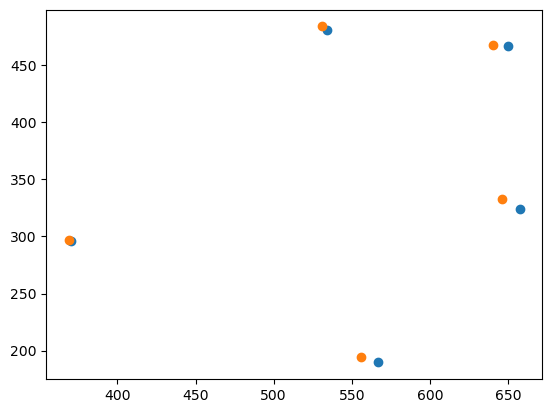

In [23]:
plt.scatter(pred_points[:,0],pred_points[:,1])

plt.scatter(c_check[:,0],c_check[:,1])





In [24]:
average_err=my_err.sum()/my_size
print("The average error is %f ,"%average_err)
if(average_err>0.1):
            print("which is more than 0.1")
else:
            print("which is smaller than 0.1, the M is acceptable")

The average error is 0.012292 ,
which is smaller than 0.1, the M is acceptable
